# Let's get started

Pull the front page and get the links.
Some use BeautifulSoup to do this but regexp
is more efficient

I remember doing this 20 years ago when it was a **lot** trickier

In [7]:
! ./.g

[master 01cc956] web
 8 files changed, 5971 insertions(+), 313 deletions(-)
 create mode 100644 .ipynb_checkpoints/text-checkpoint.html
 create mode 100644 m2y8q.pkl
 create mode 100644 m456p.pkl
 create mode 100644 m45j6.pkl
 create mode 100644 mxa7j.pkl
 create mode 100644 text.html
Counting objects: 10, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (10/10), done.
Writing objects: 100% (10/10), 1.29 MiB | 129.00 KiB/s, done.
Total 10 (delta 7), reused 0 (delta 0)
remote: Resolving deltas: 100% (7/7), completed with 4 local objects.
To https://github.com/macbuse/GUARDIAN.git
   01b30cd..01cc956  master -> master


In [54]:
import datetime, calendar
mydate = datetime.datetime.now()
 
yy, mm, dd = str(mydate).split(' ')[0].split('-')
today = calendar.month_abbr[int(mm)].lower() + '/' + dd

In [55]:
import requests
import re
pp = re.compile('<a href="(.*?)".*?data-link-name="(.*?)"', re.DOTALL)
r = requests.get('https://www.theguardian.com/')


lks =  set([ lk for lk, name in pp.findall(r.text) 
                     if name == 'article' and today in r.text ])  


In [56]:
import hashlib

class GuardianArt():
    
    def __init__(self, lk=""):
        self.raw = lk
        self.id = str(hash(self))
        
        #this is the payload
        self.goose_art = None
        
        #the rest is meta data
        self.label = lk.split('/')[3]
        self.tag = 'misc'
        
        
        #change tag from misc if appropriate to do so 
        if ( lk.split('/')[4] in ['audio', 'video', 'gallery']):
            self.tag = self.label = 'xmedia'    
        elif (self.label == 'world' or 'news' in self.label):
            self.tag = 'news'
        elif self.label == 'commentisfree':
            self.tag = 'op_ed'

    def __hash__(self):
        return int( hashlib.md5(self.raw.encode()).hexdigest(), 16)
        
    def __repr__(self):
        return self.raw
    
    def __str__(self):
        return self.raw


In [57]:
pp.findall(r.text)[:5]

[('https://www.theguardian.com/international', 'nav2 : logo'),
 ('https://jobs.theguardian.com?INTCMP=jobs_int_web_newheader_dropdown',
  'nav2 : brand extension : Search jobs'),
 ('https://holidays.theguardian.com?INTCMP=holidays_int_web_newheader',
  'nav2 : brand extension : Holidays'),
 ('https://theguardian.newspapers.com',
  'nav2 : brand extension : Digital Archive'),
 ('https://puzzles.theguardian.com/download',
  'nav2 : brand extension : Guardian Puzzles app')]

In [7]:
import pandas as pd

In [58]:
ls *csv

afuahirsch.csv  femicides3.csv    nickcohen.csv      simontisdall.csv
davidsmith.csv  femicides.csv     owen-jones.csv     transgender.csv
femicides2.csv  gabyhinsliff.csv  rebeccasolnit.csv


In [59]:
df = pd.read_csv("./afuahirsch.csv")


In [60]:
df.head()

,Title,Tag,URL
0,"Young, British and Black \n\n\n Who will hol...",commentisfree,https://www.theguardian.com/commentisfree/2020...
1,The case for British slavery reparations can n...,commentisfree,https://www.theguardian.com/commentisfree/2020...
2,Boris Johnson does have a strategy on racism a...,commentisfree,https://www.theguardian.com/commentisfree/2020...
3,The racism that killed George Floyd was built ...,commentisfree,https://www.theguardian.com/commentisfree/2020...
4,Why are Africa's coronavirus successes being o...,commentisfree,https://www.theguardian.com/commentisfree/2020...


In [61]:
uu = df[df['Tag'] == "society"]

In [62]:
uu

,Title,Tag,URL
128,The Guardian and Observer Christmas Appeal 201...,society,https://www.theguardian.com/society/2013/dec/2...
265,Guardian and Observer 2012 Christmas appeal: B...,society,https://www.theguardian.com/society/2012/dec/0...
363,Test case over sterilisation puts court of pro...,society,https://www.theguardian.com/society/2011/feb/1...
364,Measures unveiled to tackle rape retraction pr...,society,https://www.theguardian.com/society/2011/feb/1...
396,Keir Starmer orders change in dealing with rap...,society,https://www.theguardian.com/society/2010/dec/1...
410,Why women who report rape fall foul of a harsh...,society,https://www.theguardian.com/society/2010/nov/2...
431,Black and female young offenders 'failed by le...,society,https://www.theguardian.com/society/2010/oct/0...
482,At what age does a badly behaved child become ...,society,https://www.theguardian.com/society/2010/may/3...
484,Afua Hirsch's law blog Too young to understand?,society,https://www.theguardian.com/society/2010/may/2...
548,"Clarity on assisted suicide is welcome, but it...",society,https://www.theguardian.com/society/2010/feb/2...


In [65]:
import random

In [68]:
pp = random.sample( list(range(len(uu))), 10)

In [69]:
arts = [GuardianArt(_) for _ in uu.iloc[pp]['URL'].tolist()]

# Loading the articles

This used to be hard but I use Goose to do this now

In [70]:
from goose3 import Goose
#from  bs4 import BeautifulSoup

gg = Goose()

for art in arts:
    print(  str(art).split('/')[-1],)
    try:
        art.goose_art = gg.extract(url=str(art) ) 
    except:
        pass


assisted-suicide-law-defences-recognised
lord-bach-legal-aid
health.law
rise-domestic-violence-recession
lords-ruling-assisted-suicide
court-of-protection-powers-sterilisation-test-case
equlity-bill-churches-exemption
debbie-purdy-assisted-suicide-judgement
boys-rape-criminal-responsibility-courts
corby-council-toxic-waste-contamination


In [71]:
txt =  '\n'.join( [ _.goose_art.cleaned_text for _ in arts])

with open("goose.txt","w") as fp:
    fp.write(txt)

In [12]:
#from goose3 import Goose
import bs4
from  bs4 import BeautifulSoup

import requests
import re, os

def get_series( key_word='profile/hadleyfreeman'):
    
    user_agent = {'User-agent': 'Mozilla/5.0'}
    #needs to be https otherwise might provoke a redirect
    base_url = 'https://www.theguardian.com/' + key_word
    stuff = []
    while True:  
        #params instead of data bitch
        params = {'page': len(stuff) + 1}
        #if stuff == []: 
        #    params = ""
        r = requests.get( base_url, 
                          allow_redirects=False,
                          headers=user_agent, 
                          params=params)
       
        #this should fail with 301 i.e. redirect
        if r.status_code != 200: 
            print('\nFailed: %s'%r.url, r.status_code)
            break
        print('page >', r.url)
        soup = BeautifulSoup(r.text)
        stuff.append(soup.find_all("a", {"class":"fc-item__link"}) )
     
    return stuff

name = 'profile/marinahyde'
subject ='world/black-lives-matter-movement'
subject = 'society/transgender'
subject = 'profile/julia-carrie-wong'
subject = 'profile/rhiannon-lucy-cosslett'
subject = 'profile/nesrinemalik'
subject = '/profile/simone-lia'
subject = 'profile/owen-jones'
subject = 'society/transgender'
subject = 'profile/afuahirsch'
subject = 'profile/rebeccasolnit'
subject ='profile/gabyhinsliff'
subject = '/profile/davidsmith'
subject ='/profile/simontisdall'
subject = 'profile/nickcohen'
tt = get_series(key_word=subject)

page > https://www.theguardian.com/profile/nickcohen?page=1
page > https://www.theguardian.com/profile/nickcohen?page=2
page > https://www.theguardian.com/profile/nickcohen?page=3
page > https://www.theguardian.com/profile/nickcohen?page=4
page > https://www.theguardian.com/profile/nickcohen?page=5
page > https://www.theguardian.com/profile/nickcohen?page=6
page > https://www.theguardian.com/profile/nickcohen?page=7
page > https://www.theguardian.com/profile/nickcohen?page=8
page > https://www.theguardian.com/profile/nickcohen?page=9
page > https://www.theguardian.com/profile/nickcohen?page=10
page > https://www.theguardian.com/profile/nickcohen?page=11
page > https://www.theguardian.com/profile/nickcohen?page=12
page > https://www.theguardian.com/profile/nickcohen?page=13
page > https://www.theguardian.com/profile/nickcohen?page=14
page > https://www.theguardian.com/profile/nickcohen?page=15
page > https://www.theguardian.com/profile/nickcohen?page=16
page > https://www.theguardian.co

# Install bs4 in the NLP environment

conda activate NLP then do a pip install


In [13]:
data = []
for page in tt:
    data.extend([(x.text.strip(), x['href'].split('/')[3], x['href']) for x in page])
ppp, tag, urls = zip(*data)

import csv

with open('%s.csv'%subject.split('/')[-1], 'w') as fp:
    fieldnames = ['Title','Tag', 'URL']
    writer = csv.writer(fp)
    writer.writerow(fieldnames)
    for row in data:
        writer.writerow(row)

In [4]:
import pandas as pd
df = pd.read_csv('nickcohen.csv')

In [5]:
from collections import Counter

In [6]:
dd = Counter(df['Tag'].values)

In [7]:
dd

Counter({'world': 37,
         'commentisfree': 701,
         'books': 42,
         'tv-and-radio': 2,
         'lifeandstyle': 6,
         'theobserver': 11,
         'politics': 202,
         'global': 3,
         'law': 2,
         'society': 19,
         'business': 2,
         'uk': 23,
         'culture': 1,
         'stage': 1,
         'travel': 2,
         'money': 1,
         'film': 1,
         'media': 2,
         'news': 4,
         'education': 6,
         'technology': 2,
         'environment': 1})

In [15]:
cf = df[ df['Tag'] ==  'commentisfree'][:]
cf[:5]

,Title,Tag,URL
1,Fox News deals in Kremlin propaganda. So why n...,commentisfree,https://www.theguardian.com/commentisfree/2022...
2,The red wall? Boris Johnson should worry more ...,commentisfree,https://www.theguardian.com/commentisfree/2022...
3,Putin has ignited a new anti-colonial struggle...,commentisfree,https://www.theguardian.com/commentisfree/2022...
4,Russian spies? No wonder we recoil from this d...,commentisfree,https://www.theguardian.com/commentisfree/2022...
5,Collaboration thrives on everyday vanity and a...,commentisfree,https://www.theguardian.com/commentisfree/2022...


In [22]:
import spacy        
nlp = spacy.load('en_core_web_sm', parser=False, entity=False) 

In [28]:
txt = ' '.join(cf['Title'].values)
doc = nlp(txt)

In [29]:
stuff = [token.text for token in doc if not token.is_stop]

In [30]:
stuff

['Fox',
 'News',
 'deals',
 'Kremlin',
 'propaganda',
 '.',
 'freeze',
 'Rupert',
 'Murdoch',
 'assets',
 '?',
 'red',
 'wall',
 '?',
 'Boris',
 'Johnson',
 'worry',
 'Disgusted',
 'Tunbridge',
 'Wells',
 'Putin',
 'ignited',
 'new',
 'anti',
 '-',
 'colonial',
 'struggle',
 '.',
 'time',
 ',',
 'Moscow',
 'target',
 'Russian',
 'spies',
 '?',
 'wonder',
 'recoil',
 'demonisation',
 'refugees',
 'Collaboration',
 'thrives',
 'everyday',
 'vanity',
 'ambition',
 '.',
 'look',
 'RT',
 'wannabes',
 'right',
 'loudly',
 'praised',
 'Putin',
 'fallen',
 'strangely',
 'silent',
 'Tories',
 'claim',
 'worse',
 '–',
 'Ukrainians',
 'suffer',
 'Far',
 'right',
 'far',
 'left',
 'alike',
 'admired',
 'Putin',
 '.',
 'turned',
 'strongmen',
 'Putin',
 'British',
 'rich',
 'man',
 'law',
 'avoid',
 'scrutiny',
 ',',
 'crippling',
 'cost',
 'Lies',
 'come',
 'shapes',
 'sizes',
 '.',
 'government',
 'familiar',
 'Pulled',
 'current',
 'Tory',
 'indolence',
 ',',
 'Britain',
 'flounders',
 'sea',
 '

In [6]:
dates = [x.split('/')[4] for x in df['URL'].values]
ff = [x[0] == '2' for x in dates]

dates = [ x for x in dates if x[0] == '2']

dated = df[ff]

In [8]:
from collections import defaultdict

dx = defaultdict(list)

for b,a in zip(df['Tag'], dates):
    dx[b].append(int(a) )

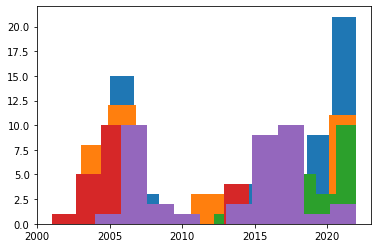

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist( dx['film']);
plt.hist( dx['books']);
plt.hist( dx['tv-and-radio']);
plt.hist( dx['society']);
plt.hist( dx['stage']);


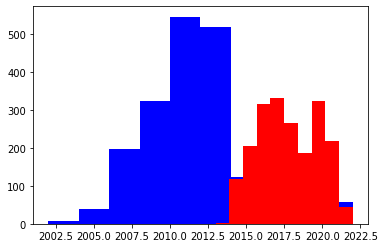

In [21]:

plt.hist( dx['world'],color='b');
plt.hist( dx['us-news'],color='r');



In [19]:
len(dx['us-news']), len(dx['world'])

(2009, 1939)

In [22]:
src = urls[2]
fn = '_'.join(src.split('/')[-1].split('-')[2:-1])
fn

'joe_biden_affordable_care_act'

In [8]:
titles, sections, urls = zip(*data)

In [10]:
' '.join(list(set(sections)))

'housing-network tv-and-radio media theobserver technology music world sport inequality social-care-network business uk-news lifeandstyle commentisfree fashion childrens-books-site global-development-professionals-network voluntary-sector-network culture-professionals-network stage artanddesign culture society teacher-network australia-news law global-development film travel membership news education football books us-news global science cities sustainable-business careers theguardian games uk politics'

In [16]:
target = [x for x in data if x[1] in ['fashion']]
len(target)
tt, ss, uu = zip(*target)
import pandas as pd

pd.DataFrame({'title': tt, 'sextion': ss})

,title,sextion
0,Ask Hadley Has Victoria’s Secret’s offensive ...,fashion
1,The look I love Caitlyn Jenner: ‘It was tough...,fashion
2,Marketing boss quits Victoria's Secret after f...,fashion
3,The look I love Munroe Bergdorf: ‘At the begi...,fashion
4,The Fashion spring/summer 2019 Munroe Bergdor...,fashion
5,'Every step I take is a defiance': Rain Dove o...,fashion
6,Ask Hadley Tantrums over tiaras … how to navi...,fashion
7,Hari Nef: ‘Identity is a dead end. It’s a snoo...,fashion
8,How I get ready Boy Meets Girl’s Rebecca Root...,fashion
9,"Transparent: finally, a realistic portrayal of...",fashion


In [21]:
#this is so that it works nicely on a restart    
prefix, start  = 'pd', 0
fns = [ int(x[len(prefix):]) for x in os.listdir('.') if x[:len(prefix)] ==  prefix ]
if fns : start = max(fns) + 1
    
print(start)
miner(uu, start=start, prefix=prefix)
    

0


In [65]:

pc = re.compile('href="(.*?)"', re.DOTALL)

ims = [ x for x in pc.findall(r.text) if "comics" in x]
pics = [ x for x in re.split('[=\+&]+',ims[0]) if 'jpg' in x]

for k, url in enumerate(pics):
    print('Getting', k)
    with open(fn + '_{:02}.jpg'.format(k),'wb') as fp:
        fp.write(requests.get(url).content)


Getting 0
Getting 1
Getting 2
Getting 3
Getting 4
Getting 5
Getting 6
Getting 7
Getting 8
Getting 9
Getting 10
Getting 11
Getting 12


In [64]:
"{:02}".format(5)

'05'

In [5]:
from collections import Counter

In [19]:
data[0][1]

'tv-and-radio'

In [21]:
xx = Counter([x[1] for x in data])
tags = Counter([x[1] for x in data])

In [22]:
[ (tag, total) for tag, total in xx.items() if total >5]
print('\n'.join([ x for x in sorted(tags.keys())]) )

artanddesign
books
cities
commentisfree
education
environment
fashion
global
lifeandstyle
media
money
music
politics
society
technology
theguardian
travel
tv-and-radio
uk-news
world


In [13]:
bag = [x  for x in data if ' '.join(x[0].split()[:2]).lower() == 'we must']
bag = [x  for x in data if ' '.join(x[0].split()[:2]).lower() != 'podcast the']
bag =  [ x for x in data if 'transphob' in x[0].lower() ]
titles, urls = zip(*bag)
with open('urls.txt','w') as fp:
    fp.write('\n'.join(urls))
    


In [23]:
tags

Counter({'tv-and-radio': 6,
         'commentisfree': 372,
         'lifeandstyle': 27,
         'books': 16,
         'society': 5,
         'world': 5,
         'artanddesign': 3,
         'environment': 1,
         'uk-news': 1,
         'money': 3,
         'music': 1,
         'media': 3,
         'politics': 3,
         'education': 2,
         'cities': 1,
         'global': 4,
         'travel': 22,
         'theguardian': 15,
         'technology': 1,
         'fashion': 2})

In [58]:
titles[:]

("We must all share the blame for our 'useless' politicians",
 "We must brave the rage, and take on won't-pay fathers",
 'We must hold our nerve and support deprived children',
 'We must be free to criticise without being called racist',
 'We must save the dome for sport and rock concerts',
 'We must save the BBC: it is too precious to switch off')

In [20]:
from goose3 import Goose
import time, os

def miner(urls, 
          start=0, 
          prefix=''):
    
    #with open('urls.txt','r') as fp:
    #    urls = list(fp.readlines())

    gg = Goose()
    failed = []
    for k, url in enumerate(urls[start:]):
        
        url = url.strip()
        ss = str(k + start)
        fn = prefix + '0'*(4 - len(ss)) + ss
        try:
            art = gg.extract( url=url)
            with open(fn,'w') as fp:    
                fp.write('\n\n'.join([art.title, art.meta_keywords, art.cleaned_text, url]))
        except:
            failed.append( url)
        time.sleep(5)

    with open('failed.txt','w') as ffp:
        ffp.write('\n'.join(failed))

#this is so that it works nicely on a restart    
prefix, start  = 'hh', 0
fns = [ int(x[len(prefix):]) for x in os.listdir('.') if x[:len(prefix)] ==  prefix ]
if fns : start = max(fns) + 1
    
print(start)
#miner(start=start, prefix=prefix)
    
    
        

0


In [37]:
k = 3000
ss = str(k)
fn = '0'*(4 - len(ss)) + ss
fn

'3000'

In [ ]:
len(urls)


In [ ]:
! more hh0000

Transphobia row leaves Scottish poetry scene in turmoil

Books,Culture,Scotland,Poetry,Transgender,UK news,PEN

A bitter conflict is escalating in the Scottish literary scene with the Scottish
 Poetry Library (SPL) standing accused of “institutional transphobia” after it s
aid that it would not support “bullying and calls for no-platforming of writers”
.

The organisation – an influential part of Scotland’s thriving poetry scene – rel
eased its statement in February after what it described as an “escalation, parti
cularly on social media, of disharmony” and an increase in writers being no-plat
formed at literary events. It stressed that the statement was to encourage freed
om of expression and was not tied to a specific incident, but, speaking to the N
ational, SPL director Asif Khan said that these issues had affected the mental h
ealth of some unnamed poets, claiming some had become suicidal.

The issue was raised in the Scottish parliament on Tuesday, where the SNP’s Joan
 McAlpine 